Data Pre processing
Train test split
Accuracy check
Random forest regressor


1.   List item
2.   List item



Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics # For model evaluation

Data collection and processing

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
#Printing the data (m/d/y) #(forcasting lsdm model)
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail() # Data is of 15 years

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# Checking missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# Getting statistical measures of the data

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
# Correlation between various columns
# 1. positive: 1 var+ other var+
# 2. negetive: 1 var+ other var-

#converting string data to float
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

correlation = gold_data.corr()

<Axes: >

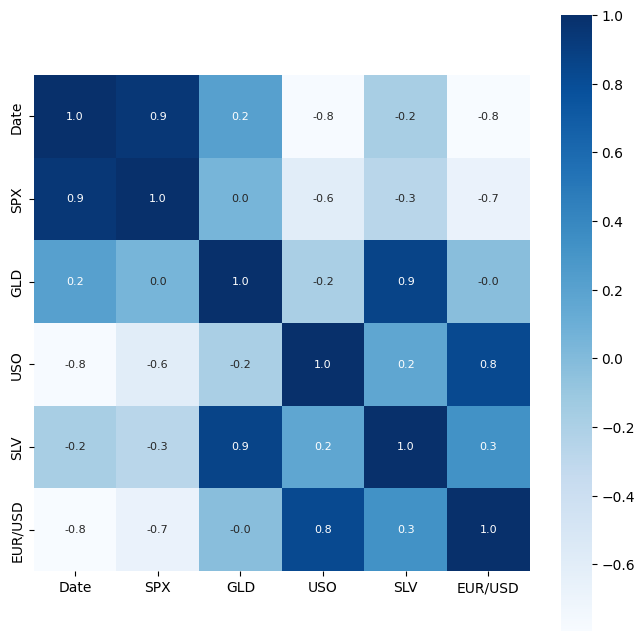

In [19]:
# constructing a heat map to examine the correaltion

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [20]:
# Correlation values of GLD

print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-21-e562ebdb0af5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

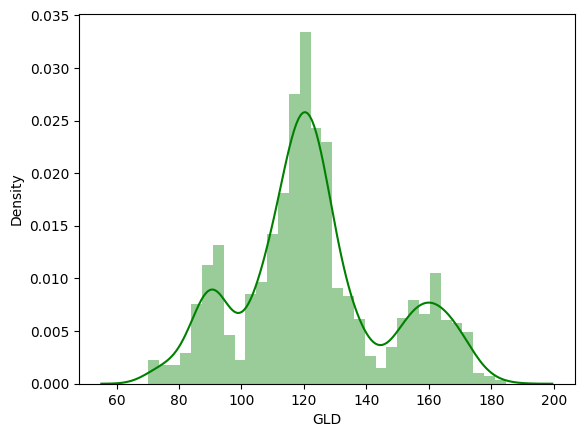

In [21]:
# Checking the distribution of gold price

sns.distplot(gold_data['GLD'], color='green')

We have most values in 120 range

Spliting the features and the target

In [22]:
# Now we will feed the data to our model => We remove date column and seperate gold column
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [27]:
# Spliting into training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Training the model using Random forest Regressor
| Price range from another value => decision tree

In [31]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
# Training the model

regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evaluation

In [34]:
# prediction on test data

test_data_prediction = regressor.predict(X_test)

In [35]:
print (test_data_prediction)

[168.56189962  81.83680004 115.93569987 127.51600085 120.73690099
 154.806497   150.32439859 125.91160045 117.48979865 126.04470028
 116.35160116 171.22100065 141.49299852 167.85459864 115.23670005
 117.4915004  139.57590286 170.13360094 158.81590282 158.67839909
 155.10760032 125.19120014 176.30749947 157.21600345 125.17470017
  93.87809982  77.57860023 120.70289984 119.20279936 167.4220001
  88.26560024 125.18449966  91.07870059 117.77460011 121.14519904
 135.90250126 115.49380119 115.75930085 148.55570009 107.27450102
 104.70950262  87.09759784 126.62700077 117.92380005 154.01569883
 119.68700024 108.34079986 108.43849854  93.06019986 127.06719762
  74.86630049 113.73009938 121.55830021 111.31979921 118.98289871
 120.54979966 160.01199946 168.98460158 147.05809737  85.6616987
  94.13010003  86.75429847  90.63029988 119.09490094 126.55010073
 127.48010032 169.72909957 122.35559926 117.46499915  98.23020018
 168.47680077 142.73739861 132.05810248 121.02770197 120.71759934
 119.7660006

In [36]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score) # Check the range of values to analyze error values (100's vs 0.98) (Use NN for lesser error)

R squared error :  0.9888761859222749


Compare the actual values and predicted values on graph

In [38]:
Y_test = list(Y_test)  # Else it would give error while plotting

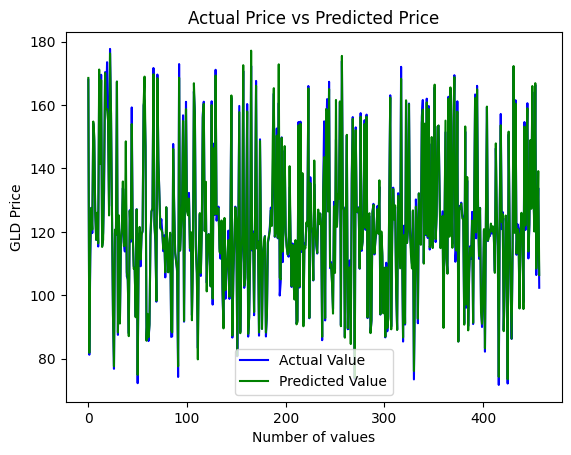

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()